# Handling n-d data with _xarray_

Tutorial for xarray: http://xarray.pydata.org/en/stable/#

In [1]:
import xarray as xr
# use xarray-functions via xr

## Loading

In [2]:
netcdf_filepath = "data/INSPIRE_1979_2016_annual_oce_surf_and_bottom_hydrograhy.nc"

In [3]:
# have a quick look into the raw file:
!ncdump -h $netcdf_filepath

netcdf INSPIRE_1979_2016_annual_oce_surf_and_bottom_hydrograhy {
dimensions:
	time = 38 ;
	lon = 586 ;
	lat = 538 ;
variables:
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "longitude [Tracer grid]" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
		lon:_FillValue = NaNf ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude  [Tracer grid]" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
		lat:_FillValue = NaNf ;
	float BTEMP(time, lat, lon) ;
		BTEMP:long_name = "Bottom temperature" ;
		BTEMP:units = "degree Celsius" ;
		BTEMP:_FillValue = NaNf ;
	float SSS(time, lat, lon) ;
		SSS:long_name = "Salinity" ;
		SSS:units = "psu" ;
		SSS:_FillValue = NaNf ;
	float BSALT(time, lat, lon) ;
		BSALT:long_name = "Bottom salinity" ;
		BSALT:units = "psu" ;
		BSALT:_FillValue = NaNf ;
	float SST(time, lat, lon) ;
		SST:long_name = "Temperature" ;
		SST:units = "degree Celsius" ;
		SST:_FillValue = NaNf ;
	int time(time) ;
		time:units 

In [4]:
# load netcdf data
netcdf_data = xr.load_dataset(netcdf_filepath)
netcdf_data

<xarray.Dataset>
Dimensions:  (lat: 538, lon: 586, time: 38)
Coordinates:
  * lon      (lon) float32 4.0275 4.0725 4.1175 ... 30.2625 30.3075 30.3525
  * lat      (lat) float32 53.8225 53.845 53.8675 53.89 ... 65.86 65.8825 65.905
  * time     (time) datetime64[ns] 1979-12-31 1980-12-31 ... 2016-12-31
Data variables:
    BTEMP    (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    SSS      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    BSALT    (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    SST      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    history:  Created from monthly INSPIRE fields weighting all months equally.

## Examining

In [5]:
# show statistics
netcdf_data.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    BTEMP    float32 5.3646345
    SSS      float32 13.291877
    BSALT    float32 15.346697
    SST      float32 8.707838

In [6]:
netcdf_data.isel(lon=slice(None, None, 20), lat = slice(None, None, 20)).to_dataframe().describe()

,BTEMP,SSS,BSALT,SST
count,8322.000000,8322.000000,8322.000000,8322.000000
mean,5.295172,12.630217,14.696634,8.582672
std,1.958097,10.887428,11.783319,1.676170
min,0.682546,0.655850,2.077944,4.180015
25%,3.822018,5.463521,6.083572,7.335703
50%,5.046099,7.103895,8.257272,8.756407
75%,6.849345,19.238914,29.928255,9.839606
max,11.164152,34.520782,34.816051,12.874334


In [7]:
netcdf_data.sel(lon = 20, lat = 56, method = "nearest").to_dataframe().describe()

,lon,lat,BTEMP,SSS,BSALT,SST
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,20.002501,56.004997,4.359470,7.427375,7.550605,9.601417
std,0.000000,0.000000,0.640812,0.239035,0.252681,0.769491
min,20.002501,56.005001,3.295662,7.119353,7.231251,7.372640
25%,20.002501,56.005001,3.891907,7.268058,7.380745,9.232140
50%,20.002501,56.005001,4.370319,7.324729,7.433021,9.647312
75%,20.002501,56.005001,4.778517,7.594313,7.697138,10.187290
max,20.002501,56.005001,5.885517,7.941854,8.188764,10.772979


(array([ 16448., 203353., 437974., 558739., 771069., 926917., 402040.,
        105317.,  22937.,   2262.]),
 array([ 3.575371 ,  4.7133813,  5.851392 ,  6.9894023,  8.127413 ,
         9.265423 , 10.403433 , 11.541444 , 12.679454 , 13.817465 ,
        14.955475 ], dtype=float32),
 <BarContainer object of 10 artists>)

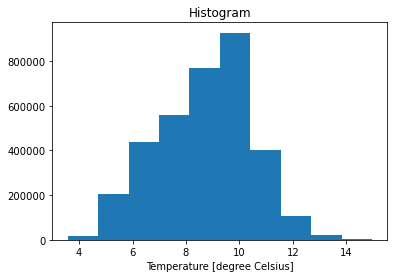

In [8]:
# plot data
netcdf_data.SST.plot()

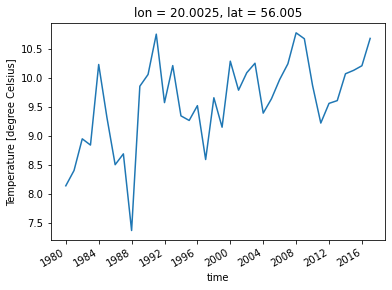

In [9]:
netcdf_data.SST.sel(lon=20, lat=56, method = "nearest").plot(x="time")

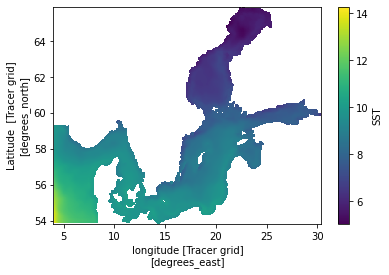

In [10]:
netcdf_data.SST.mean(dim="time").plot()

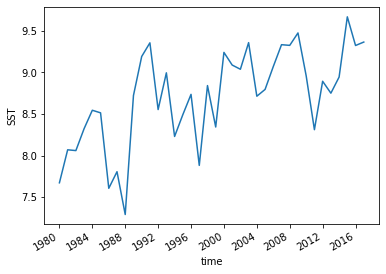

In [11]:
netcdf_data.SST.mean(dim=["lon", "lat"]).plot()

<AxesSubplot:ylabel='time'>

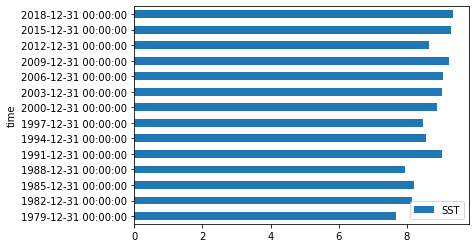

In [12]:
netcdf_data.SST.mean(dim=["lon", "lat"]).to_dataframe().resample("3Y").mean().plot.barh()